<a href="https://colab.research.google.com/github/uervitonsantos/Exercicios_Metodos_Quantitativos/blob/main/Exercicios_Metodos_Quantitativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# rpy2 fornece uma interface que permite executar R em processos Python.
!pip install rpy2

In [ ]:
%load_ext rpy2.ipython

##1 - Para os exercícios a seguir avalie os pressupostos do modelo ANOVA.

(a) - Um restaurante oferece um molho
especial que acompanha um peixe.
A maioria dos clientes regulares é
composta por alunos, funcionários e
executivos. Alguns clientes pedem o
molho especial, mas o dono do
restaurante acredita que os alunos e
os funcionários gostam mais do
molho especial do que os
executivos. Considerando 13 dias
representativos para cada grupo,
existe nesse caso alguma relação
significativa? Use α = 5%.

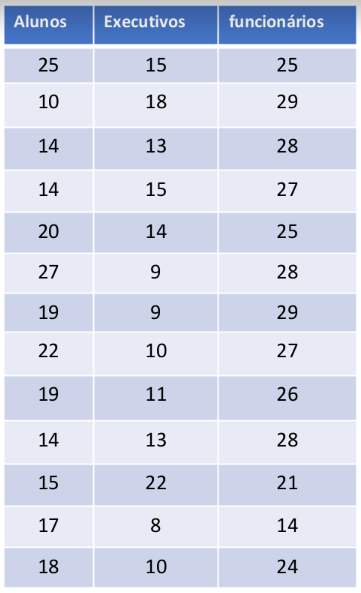

In [ ]:
%%R
# install e chamada dos pacotes necessarios para o analise dos dados
if(!require(tidyverse))
install.packages("tidyverse")
if(!require(RVAideMemoire))
install.packages("nortest")
if(!require(psych))
install.packages("psych")
if(!require(rstatix))
install.packages("rstatix")
if(!require(car))
install.packages("car")
if(!require(DescTools))
install.packages("DescTools")

In [45]:
%%R
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)
library(nortest)
library(psych)
library(rstatix)
library(car)
library(DescTools)

In [12]:
%%R
# construção das listas com os valores para cada grupo
Alunos <- c(25, 10, 14, 14, 20, 27, 19, 22, 19, 14, 15, 17, 18)
Executivos <- c(15, 18, 13, 15, 14, 9, 9, 10,11, 13, 22, 8, 10)
Funcionários <- c( 25, 29, 28, 27, 25, 28, 29, 27, 26, 28, 21, 14, 24)

# montando um dataFrame com os grupos selecionados
clientes <- data.frame(Alunos, Executivos, Funcionários)

#str é uma função para verificar os tipos de dados de cada grupos
str(clientes)

'data.frame':	13 obs. of  3 variables:
 $ Alunos      : num  25 10 14 14 20 27 19 22 19 14 ...
 $ Executivos  : num  15 18 13 15 14 9 9 10 11 13 ...
 $ Funcionários: num  25 29 28 27 25 28 29 27 26 28 ...


Hipóteses:

H0: Os grupos possuem a mesma variância

H1: Pelo menos um grupo tem mediana diferente das demais

In [62]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
alunos <- shapiro.test(Alunos)
executivos <- shapiro.test(Executivos)
funcionarios <- shapiro.test(Funcionários)

In [63]:
%%R
# resultado do test de shapiro-wilk para o grupo Alunos
alunos


	Shapiro-Wilk normality test

data:  Alunos
W = 0.96593, p-value = 0.8414



In [64]:
%%R
# resultado do test de shapiro-wilk para o grupo Executivos
executivos


	Shapiro-Wilk normality test

data:  Executivos
W = 0.91919, p-value = 0.2446



In [65]:
%%R
# resultado do test de shapiro-wilk para o grupo Funcionarios
funcionarios


	Shapiro-Wilk normality test

data:  Funcionários
W = 0.77607, p-value = 0.003592



In [57]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
clie <- clientes %>% pivot_longer(cols = everything(), names_to = "cliente")
clie

# A tibble: 39 × 2
   cliente      value
   <chr>        <dbl>
 1 Alunos          25
 2 Executivos      15
 3 Funcionários    25
 4 Alunos          10
 5 Executivos      18
 6 Funcionários    29
 7 Alunos          14
 8 Executivos      13
 9 Funcionários    28
10 Alunos          14
# … with 29 more rows
# ℹ Use `print(n = ...)` to see more rows


In [68]:
%%R
# teste de Levene para verificar a homogeneidade de variancias
leveneTest(value ~ cliente, data = clie, center=mean)

Levene's Test for Homogeneity of Variance (center = mean)
      Df F value Pr(>F)
group  2  0.3527 0.7052
      36               


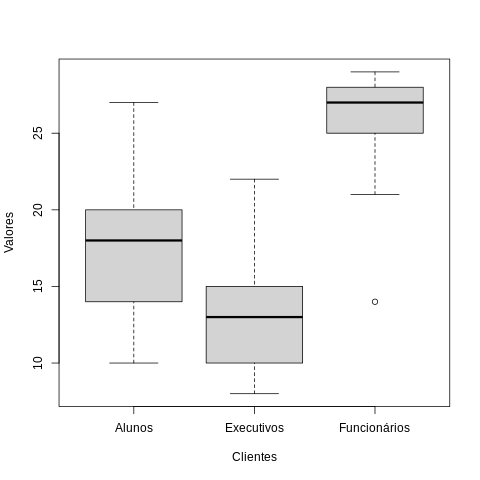

In [78]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
boxplot(value ~ cliente, data = clie, ylab="Valores", xlab="Clientes")

In [79]:
# Teste ANOVA para análisar de Variância entre os grupos
%%R
anova_cliente <- aov(value ~ cliente, data = clie)
anova_cliente

Call:
   aov(formula = value ~ cliente, data = clie)

Terms:
                  cliente Residuals
Sum of Squares  1046.0000  670.9231
Deg. of Freedom         2        36

Residual standard error: 4.31703
Estimated effects may be unbalanced


In [59]:
%%R
summary(anova_cliente)

            Df Sum Sq Mean Sq F value   Pr(>F)    
cliente      2 1046.0   523.0   28.06 4.51e-08 ***
Residuals   36  670.9    18.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [60]:
%%R
TUKEY <- TukeyHSD(anova_cliente, "cliente", ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ cliente, data = clie)

$cliente
                             diff      lwr       upr     p adj
Alunos-Executivos        5.153846 1.014970  9.292722 0.0118142
Funcionários-Executivos 12.615385 8.476508 16.754261 0.0000000
Funcionários-Alunos      7.461538 3.322662 11.600415 0.0002618



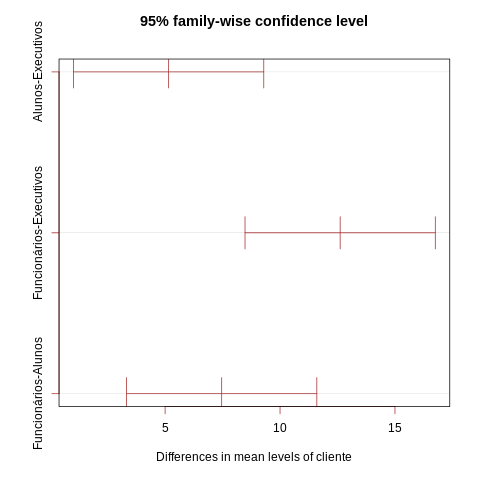

In [61]:
%%R
plot(TUKEY, col="brown")

(b) - Uma empresa coletou dados
sobre a quantidade de sacos
de arroz produzidos em três
regiões durante quinze dias.
Ela deseja verificar se
existem diferenças entre as
regiões, segundo as
quantidades de sacos de
arroz produzidos por região
apresentadas na tabela ao
lado. Use 95% de confiança.

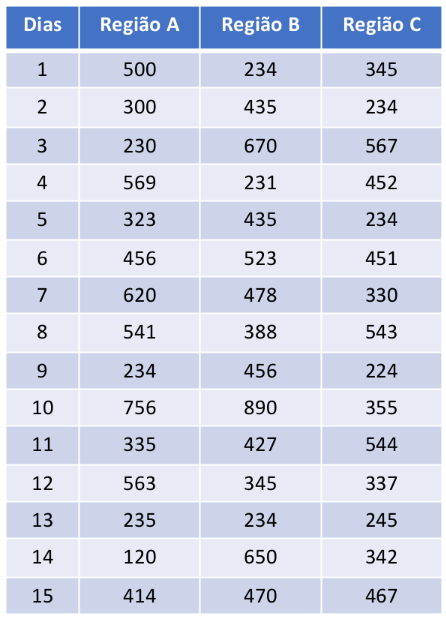

In [ ]:
%%R
Dias <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
Região_A <- c(500,300,230,569,323,456,620,541,234,756,335,563,235,120,414)
Região_B <- c(234,435,670,231,435,523,478,388,456,890,427,345,234,650,470)
Região_C <- c(345,234,567,452,234,451,330,543,224,355,544,337,245,342,467)

regiao <- data.frame(Região_A, Região_B, Região_C)
regiao

In [ ]:
%%R
regiao <- regiao %>% pivot_longer(cols = everything(), names_to = "regiao")
regiao

In [ ]:
# Análise de Variância
%%R
anova_regiao <- aov(value ~ regiao, data = regiao)
anova_regiao

In [ ]:
%%R
summary(anova_regiao)

In [ ]:
%%R
TUKEY <- TukeyHSD(anova_regiao, "regiao", ordered = TRUE)
TUKEY

In [ ]:
%%R
plot(TUKEY, col="red")